**TASK GIVEN**

1. The training archive contains 25,000 images of dogs and cats.  Implement VGG model of CNN by taking an example of classifying an image as a dog or cat. Dataset can be downloaded from https://www.kaggle.com/c/dogs-vs-cats/data

- 208W1A1201
- 208W1A1202
- 208W1A1203

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


# 1 : Extraction

we will extaract the data and use only 2000 of the total data to make it faster and we will try to reach high accuracy 

In [2]:
import zipfile
original_bath ='/kaggle/input/dogs-vs-cats/train.zip'
directory_to_extract_to= "/kaggle/working/data"
with zipfile.ZipFile(original_bath, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [3]:
import zipfile
original_bath ='/kaggle/input/dogs-vs-cats/test1.zip'
directory_to_extract_to= "/kaggle/working/data"
with zipfile.ZipFile(original_bath, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [4]:
import os , shutil


original_bath = "/kaggle/working/data"
base_dir = '/kaggle/working//cats_and_dogs_small'
train_dir = os.path.join(base_dir , 'train')
validation_dir = os.path.join(base_dir , 'validation')
test_dir = os.path.join(base_dir , 'test')

os.mkdir(base_dir)

os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)



In [5]:
train_cats_dir = os.path.join(train_dir , 'cats')
train_dogs_dir = os.path.join(train_dir , 'dogs')
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)


validation_cats_dir = os.path.join(validation_dir , 'cats')
validation_dogs_dir = os.path.join(validation_dir , 'dogs')
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)


test_cats_dir = os.path.join(test_dir , 'cats')
test_dogs_dir = os.path.join(test_dir , 'dogs')
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)


In [6]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
    src  = os.path.join(original_bath+'/train' , fname)
    dst = os.path.join(train_cats_dir , fname)
    shutil.copyfile(src , dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000 , 1500)]
for fname in fnames :
    src  = os.path.join(original_bath+'/train' , fname)
    dst = os.path.join(validation_cats_dir , fname)
    shutil.copyfile(src , dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500 , 2000)]
for fname in fnames :
    src  = os.path.join(original_bath+'/train' , fname)
    dst = os.path.join(test_cats_dir , fname)
    shutil.copyfile(src , dst)


In [7]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
    src  = os.path.join(original_bath+'/train' , fname)
    dst = os.path.join(train_dogs_dir , fname)
    shutil.copyfile(src , dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000 , 1500)]
for fname in fnames :
    src  = os.path.join(original_bath+'/train' , fname)
    dst = os.path.join(validation_dogs_dir , fname)
    shutil.copyfile(src , dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500  , 2000)]
for fname in fnames :
    src  = os.path.join(original_bath+'/train' , fname)
    dst = os.path.join(test_dogs_dir , fname)
    shutil.copyfile(src , dst)


In [8]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dogs images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dogs images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dogs images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dogs images: 1000
total validation cat images: 500
total validation dogs images: 500
total test cat images: 500
total test dogs images: 500


In [9]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dropout(.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [11]:
from keras import optimizers

model.compile(loss = "binary_crossentropy" , optimizer=optimizers.RMSprop(learning_rate=1e-4) ,metrics=['acc'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator



train_datagen = ImageDataGenerator(rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)




train_generator = train_datagen.flow_from_directory(
    train_dir , 
    batch_size=32 , 
    class_mode='binary',
    target_size=(150 , 150)
)
vlidation_generator = test_datagen.flow_from_directory(
    validation_dir , 
    batch_size=32 , 
    target_size=(150 , 150),

    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch , labels_batch in train_generator:
    print('data batch shape' , data_batch.shape)
    print('labels batch shape' , labels_batch.shape)
    break

data batch shape (32, 150, 150, 3)
labels batch shape (32,)


In [14]:
history = model.fit(
    train_generator , 
    steps_per_epoch=20 , 
    epochs=100 , 
    validation_data=vlidation_generator , 
    validation_steps=10
)


Epoch 1/100
20/20 [==============================] - 18s 238ms/step - loss: 0.6964 - acc: 0.4953 - val_loss: 0.6947 - val_acc: 0.4688
Epoch 2/100
20/20 [==============================] - 5s 231ms/step - loss: 0.6934 - acc: 0.5125 - val_loss: 0.6899 - val_acc: 0.5969
Epoch 3/100
20/20 [==============================] - 5s 239ms/step - loss: 0.6881 - acc: 0.5176 - val_loss: 0.6974 - val_acc: 0.5094
Epoch 4/100
20/20 [==============================] - 5s 228ms/step - loss: 0.6899 - acc: 0.5312 - val_loss: 0.6873 - val_acc: 0.4812
Epoch 5/100
20/20 [==============================] - 5s 262ms/step - loss: 0.6907 - acc: 0.5176 - val_loss: 0.6815 - val_acc: 0.5188
Epoch 6/100
20/20 [==============================] - 5s 230ms/step - loss: 0.6851 - acc: 0.5453 - val_loss: 0.7106 - val_acc: 0.4938
Epoch 7/100
20/20 [==============================] - 5s 227ms/step - loss: 0.6859 - acc: 0.5516 - val_loss: 0.6954 - val_acc: 0.5125
Epoch 8/100
20/20 [==============================] - 5s 236ms/step -

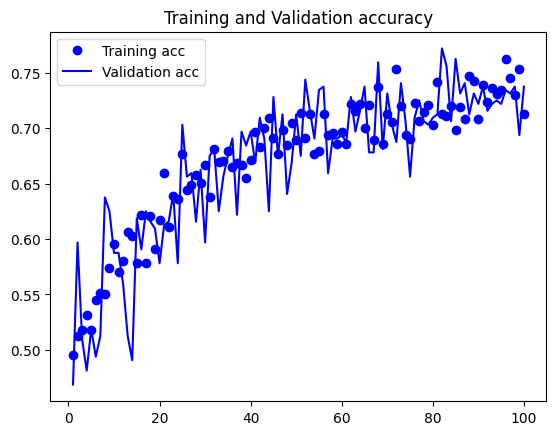

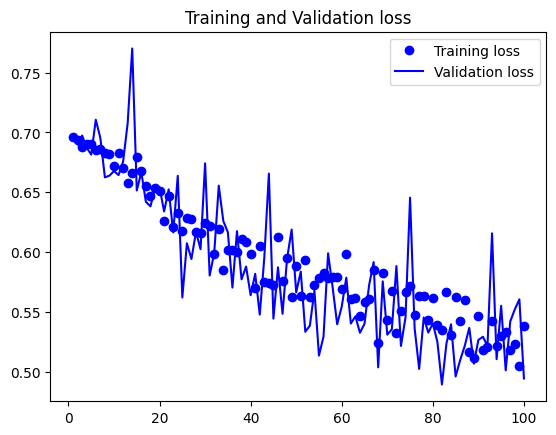

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc= history.history['val_acc']
loss = history.history['loss']
val_loss= history.history['val_loss']

epochs = range(1 , len(acc)+1)
plt.plot(epochs , acc , 'bo' , label = "Training acc")
plt.plot(epochs , val_acc , 'b' , label ="Validation acc")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs , loss , 'bo' , label = "Training loss")
plt.plot(epochs , val_loss , 'b' , label ="Validation loss")
plt.title("Training and Validation loss")
plt.legend()

In [16]:
##using VGG 16 

from keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet' , 
                  include_top =False , 
                  input_shape=(150 , 150 , 3))

58889256/58889256 [==============================] - 0s 0us/step


In [17]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features (direcrory , sample_count):
    ##(4,4,512) because the last shape in vgg is (4,4,512)
    features =np.zeros(shape =(sample_count , 4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        direcrory, 
        target_size=(150 , 150),
        batch_size=batch_size,
        class_mode='binary'

    )
    i=0
    for input_batch , labels_batch in generator:
        feature_batch = conv_base.predict(input_batch)
        features[i*batch_size :(i+1) * batch_size] =feature_batch
        labels[i*batch_size : (i+1)*batch_size]= labels_batch
        i+=1
        if i*batch_size >= sample_count:
            break
    return features , labels

In [18]:
train_features , train_labels = extract_features(train_dir , 2000)
validation_features , validation_labels = extract_features(validation_dir , 1000)
test_features , test_labels = extract_features(test_dir , 1000)



Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 25ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 21ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 32ms/step


In [19]:
from keras import layers , models

train_features = np.reshape(train_features , (2000 , 4*4*512))
validation_features = np.reshape(validation_features , (1000 , 4*4*512))
test_features = np.reshape(test_features , (1000 , 4*4*512))


In [20]:
model = models.Sequential()
model.add(layers.Dense(256 , activation="relu" , input_dim = 512*4*4))
model.add(layers.Dropout(.5))
model.add(layers.Dense(1 ,activation="sigmoid"))


In [21]:
from keras import optimizers
model.compile(loss='binary_crossentropy' , optimizer=optimizers.RMSprop(lr=1e-4) ,metrics=['acc'])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
history = model.fit(train_features, train_labels , 
                    epochs=30 , 
                    validation_data=(validation_features , validation_labels))

Epoch 1/30
63/63 [==============================] - 1s 8ms/step - loss: 0.4568 - acc: 0.7790 - val_loss: 0.3053 - val_acc: 0.8830
Epoch 2/30
63/63 [==============================] - 0s 6ms/step - loss: 0.3127 - acc: 0.8690 - val_loss: 0.3059 - val_acc: 0.8560
Epoch 3/30
63/63 [==============================] - 0s 5ms/step - loss: 0.2514 - acc: 0.9000 - val_loss: 0.2595 - val_acc: 0.9010
Epoch 4/30
63/63 [==============================] - 0s 5ms/step - loss: 0.2233 - acc: 0.9075 - val_loss: 0.2956 - val_acc: 0.8640
Epoch 5/30
63/63 [==============================] - 0s 5ms/step - loss: 0.1944 - acc: 0.9265 - val_loss: 0.2639 - val_acc: 0.8810
Epoch 6/30
63/63 [==============================] - 0s 6ms/step - loss: 0.1653 - acc: 0.9360 - val_loss: 0.2465 - val_acc: 0.8970
Epoch 7/30
63/63 [==============================] - 0s 6ms/step - loss: 0.1522 - acc: 0.9460 - val_loss: 0.2339 - val_acc: 0.9020
Epoch 8/30
63/63 [==============================] - 0s 7ms/step - loss: 0.1322 - acc: 0.95

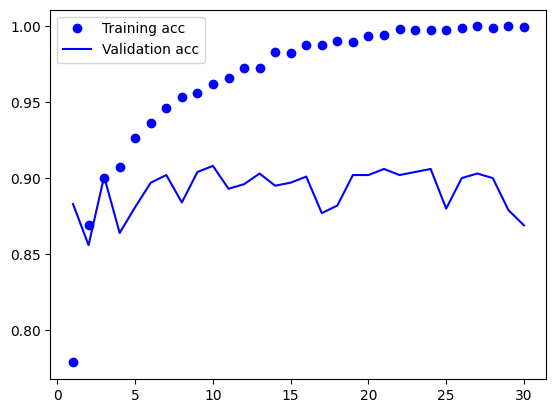

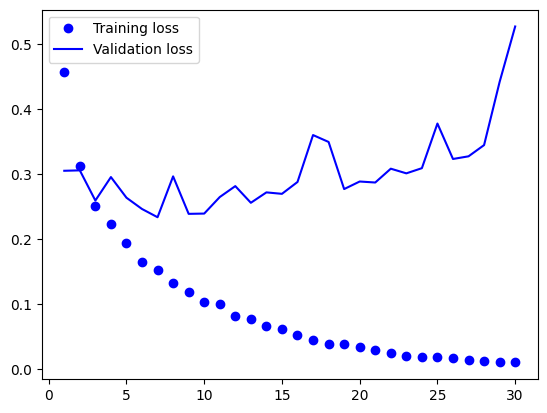

In [23]:
import matplotlib.pyplot as plt
acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1 , len(acc)+1)
plt.plot(epochs , acc ,'bo' , label = "Training acc")
plt.plot(epochs , val_acc ,'b' , label = "Validation acc")
plt.legend()
plt.figure()

plt.plot(epochs , loss ,'bo' , label = "Training loss")
plt.plot(epochs , val_loss ,'b' , label = "Validation loss")
plt.legend()
plt.show()


In [24]:
from keras import layers , models
model  = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256 , activation="relu"))
model.add(layers.Dense(1 , activation="sigmoid"))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [26]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/tmp/ipykernel_28/3077734672.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 27s 224ms/step - loss: 0.4811 - acc: 0.7485 - val_loss: 0.2913 - val_acc: 0.8810
Epoch 2/30
100/100 [==============================] - 22s 223ms/step - loss: 0.2621 - acc: 0.8870 - val_loss: 0.1382 - val_acc: 0.9460
Epoch 3/30
100/100 [==============================] - 22s 217ms/step - loss: 0.2078 - acc: 0.9165 - val_loss: 0.1083 - val_acc: 0.9610
Epoch 4/30
100/100 [==============================] - 22s 224ms/step - loss: 0.1858 - acc: 0.9250 - val_loss: 0.1011 - val_acc: 0.9610
Epoch 5/30
100/100 [==============================] - 22s 217ms/step - loss: 0.1582 - acc: 0.9445 - val_loss: 0.0935 - val_acc: 0.9610
Epoch 6/30
100/100 [==============================] - 22s 223ms/step - loss: 0.1273 - acc: 0.9475 - val_loss: 0.2593 - val_acc: 0.8980
Epoch 7/30
100/100 [==============================] - 21s 212ms/step - loss: 0.1168 - acc: 0.9585 - val_loss: 0.2658 - val_acc: 0.9180
Epoch 8/30
100/100 [==============================] - 2

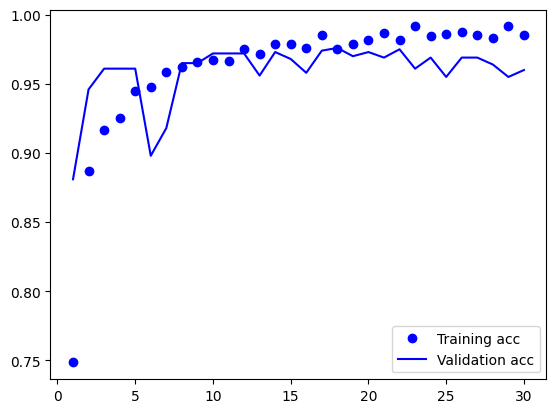

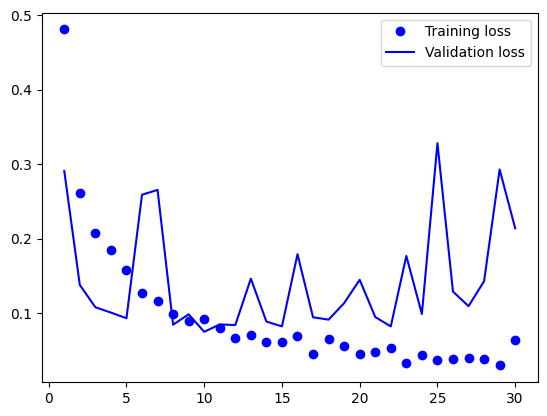

In [27]:
import matplotlib.pyplot as plt
acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1 , len(acc)+1)
plt.plot(epochs , acc ,'bo' , label = "Training acc")
plt.plot(epochs , val_acc ,'b' , label = "Validation acc")
plt.legend()
plt.figure()

plt.plot(epochs , loss ,'bo' , label = "Training loss")
plt.plot(epochs , val_loss ,'b' , label = "Validation loss")
plt.legend()
plt.show()


In [28]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [29]:
model.compile(loss ='binary_crossentropy' , 
              optimizer=optimizers.RMSprop(lr=1e-4) , 
            metrics=['acc'])





In [30]:
history = model.fit(train_generator , 
                    epochs=100 , 
                    steps_per_epoch=100 ,
                    validation_data=validation_generator , 
                    validation_steps=50)


Epoch 1/100
100/100 [==============================] - 21s 202ms/step - loss: 0.0970 - acc: 0.9800 - val_loss: 0.1524 - val_acc: 0.9670
Epoch 2/100
100/100 [==============================] - 19s 193ms/step - loss: 0.0746 - acc: 0.9815 - val_loss: 0.1948 - val_acc: 0.9620
Epoch 3/100
100/100 [==============================] - 17s 172ms/step - loss: 0.0504 - acc: 0.9870 - val_loss: 0.1794 - val_acc: 0.9690
Epoch 4/100
100/100 [==============================] - 18s 180ms/step - loss: 0.0530 - acc: 0.9890 - val_loss: 0.2245 - val_acc: 0.9660
Epoch 5/100
100/100 [==============================] - 17s 171ms/step - loss: 0.0561 - acc: 0.9830 - val_loss: 0.1537 - val_acc: 0.9740
Epoch 6/100
100/100 [==============================] - 18s 178ms/step - loss: 0.0446 - acc: 0.9880 - val_loss: 0.5049 - val_acc: 0.9550
Epoch 7/100
100/100 [==============================] - 17s 171ms/step - loss: 0.0489 - acc: 0.9890 - val_loss: 0.2365 - val_acc: 0.9710
Epoch 8/100
100/100 [===========================

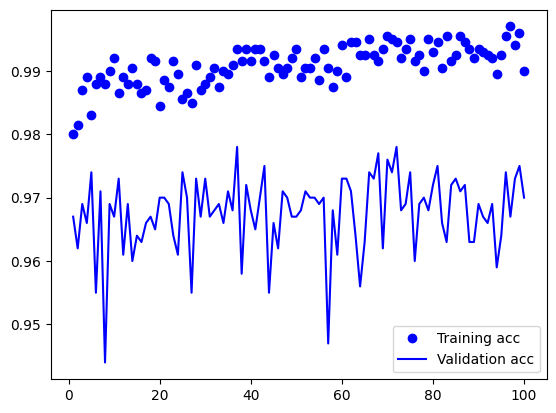

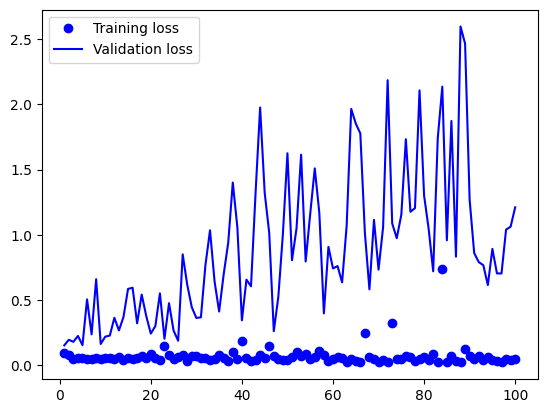

In [31]:
import matplotlib.pyplot as plt
acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1 , len(acc)+1)
plt.plot(epochs , acc ,'bo' , label = "Training acc")
plt.plot(epochs , val_acc ,'b' , label = "Validation acc")
plt.legend()
plt.figure()

plt.plot(epochs , loss ,'bo' , label = "Training loss")
plt.plot(epochs , val_loss ,'b' , label = "Validation loss")
plt.legend()
plt.show()


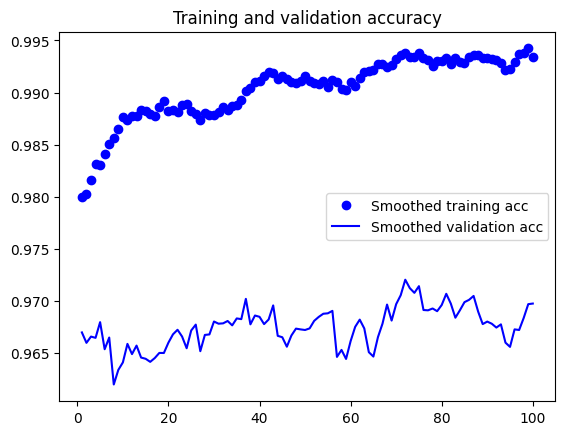

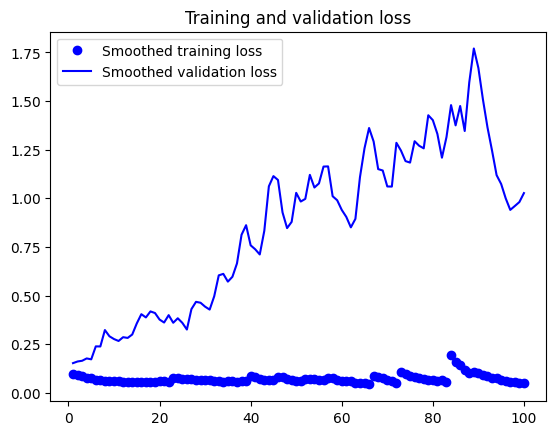

In [32]:
def smooth_curve(points , factor =.8):
    somoothed_points = []
    for point in points:
        if somoothed_points:
            previous = somoothed_points[-1]
            somoothed_points.append(previous *factor + point *(1-factor))
        else:
            somoothed_points.append(point)
    return somoothed_points


acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,
smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [33]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

Found 1000 images belonging to 2 classes.


/tmp/ipykernel_28/2012028935.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
